# Monte Carlo simulation example

Based on [this article](https://pbpython.com/monte-carlo.html)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [3]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
pct_to_target[0:10]

array([1.04, 1.17, 1.1 , 1.12, 0.95, 0.79, 1.05, 1.14, 0.97, 0.96])

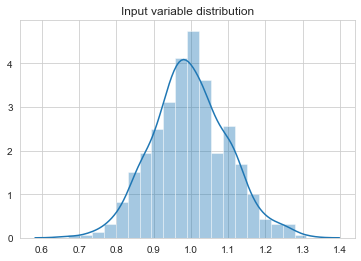

In [4]:
_ = sns.distplot(pct_to_target).set_title('Input variable distribution')

In [5]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [7]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [8]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.04,75000,78000.0
1,1.17,75000,87750.0
2,1.10,300000,330000.0
3,1.12,100000,112000.0
4,0.95,100000,95000.0


In [9]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [10]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [11]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.04,75000,78000.0,0.04,3120.0
1,1.17,75000,87750.0,0.04,3510.0
2,1.10,300000,330000.0,0.04,13200.0
3,1.12,100000,112000.0,0.04,4480.0
4,0.95,100000,95000.0,0.03,2850.0


In [12]:
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [13]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])


In [14]:
results_df.head()

,Sales,Commission_Amount,Sales_Target
0,84121500.0,2848738.0,84225000
1,79701500.0,2749242.0,79375000
2,82120000.0,2812195.0,82200000
3,86552000.0,2983492.0,86100000
4,85842250.0,2961110.0,85675000


In [15]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,848,180.75","2,863,437.586","83,842,325.0"
std,"2,740,549.5179438707","103,509.5313723114","2,704,506.391968634"
min,"75,104,750.0","2,510,815.0","75,725,000.0"
25%,"81,940,875.0","2,791,497.5","81,900,000.0"
50%,"83,812,500.0","2,858,208.5","83,887,500.0"
75%,"85,697,500.0","2,933,193.5","85,600,000.0"
max,"92,821,750.0","3,196,710.0","93,200,000.0"


In [16]:
results_df.head()

,Sales,Commission_Amount,Sales_Target
0,84121500.0,2848738.0,84225000
1,79701500.0,2749242.0,79375000
2,82120000.0,2812195.0,82200000
3,86552000.0,2983492.0,86100000
4,85842250.0,2961110.0,85675000


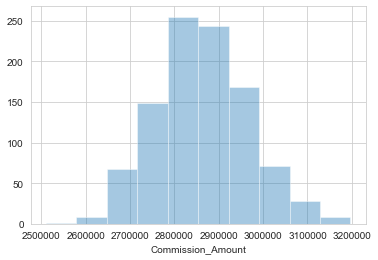

In [17]:
_ = sns.distplot(results_df.Commission_Amount, kde=False, bins=10)